In [0]:
import nltk
import gensim
from nltk.stem.snowball import SnowballStemmer
import re
import string
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
import pandas as pd
import numpy
import gc
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from gensim.test.utils import get_tmpfile
nltk.download('stopwords')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
path = '/content/drive/My Drive/Tweets/Archive1'
path2 = '/content/drive/My Drive/Tweets/Archive2'

In [0]:
files = os.listdir(path)
files2 = os.listdir(path2)

In [33]:
for i in range(len(files)):
  if (i==0):
    df = pd.read_csv(path + '/' + files[i])
  else:
    df = pd.concat([df, pd.read_csv(path + '/' + files[i])])

KeyboardInterrupt: ignored

In [0]:
len(df)

In [0]:
for i in range(len(files2)):
  if (i==0):
    df2 = pd.read_csv(path2 + '/' + files2[i])
  else:
    df2 = pd.concat([df, pd.read_csv(path2 + '/' + files2[i])])
len(df2)

In [0]:
engTweets = df[df.lang == 'en']
engTweets = engTweets[engTweets.followers_count > 100]
engTweets = engTweets[engTweets.is_retweet != True]
unique = engTweets.groupby('user_id')['text'].nunique()

In [0]:
unique = pd.DataFrame(unique)
unique = unique.reindex()
unique

In [0]:
uniqueThres = unique[unique['text']>10].reset_index()

In [0]:
uniqueDF2 = pd.DataFrame(uniqueThres['user_id'])

In [0]:
uniqueDF

In [0]:
uniqueDF2

In [0]:
uniqueDF.to_pickle("/content/drive/My Drive/Tweets/screenNames2.pkl")


In [0]:
uniqueDF3 = list(set(uniqueDF['user_id']).intersection(uniqueDF2['user_id']))

In [0]:
len(uniqueDF3)

In [0]:
uniqueDF3

In [0]:
pd.DataFrame(uniqueDF3).to_pickle("/content/drive/My Drive/Tweets/ids3.pkl")

In [0]:
x = df[df['user_id'].isin(usrTags)]
x

In [0]:
file = open("/content/drive/My Drive/Tweets/usrTweets1.pkl",'rb')
file2 = open("/content/drive/My Drive/Tweets/usrTweets2.pkl",'rb')
usrTweets = pickle.load(file)[:]['text'].append(pickle.load(file2)[:]['text']).reset_index()

In [0]:
test = usrTweets

In [0]:
file = open("/content/drive/My Drive/Tweets/ids3.pkl",'rb')
ids = pickle.load(file)

In [0]:
labels = test['index'].isin(ids)
labels

In [0]:
for i in range(len(test)):
  if (labels[i] == False):
    test = test.drop([i])

In [0]:
len(test)

In [0]:
test = test.drop([3])

In [0]:
labels[4349]

In [0]:
z = 0
for i in range(len(test)):
    if (labels[i]==True):
       z += 1


In [0]:
uniques = list(set(usrTweets['index']).intersection(ids[0]))

In [0]:
ids[0]

In [0]:
usrTweets = usrTweets[~usrTweets['index'].isin(ids)]

In [0]:
len(usrTweets)

In [0]:
ids

In [0]:
model2 = Doc2Vec.load("/content/drive/My Drive/Tweets/modelD2V3.model")

In [0]:
pca = PCA(n_components=2).fit(model2.docvecs.doctag_syn0)
datapoint = pca.transform(model2.docvecs.doctag_syn0)

In [0]:
plt.figure(figsize=[80,80])
plt.scatter(datapoint[:, 0], datapoint[:, 1])
plt.show()

In [0]:
kmeans_model = KMeans(n_clusters=8, init='k-means++', max_iter=10000) 
X = kmeans_model.fit(modelD2V.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(modelD2V.docvecs.doctag_syn0)

In [0]:

%matplotlib inline

plt.figure(figsize=[30,30])
label1 = ["#FFFF00", "#008000", "#0000FF", "#807689", "#ff99ff", "#ff0000", "#090914", "#ff9900", "#ccafaf", "#cd02fa", "#02f2fa", "#2bfa02" ]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
          
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [0]:
f_open = open('/content/drive/My Drive/Tweets/output4.txt','r') 


In [0]:
following = pd.DataFrame(columns=['Username', 'Follow'])
user = 'First'
follow = 'First'
for i in range(163956):
  line = f_open.readline().replace('\n', '')
  if(line == '--- Break ---'):
      print('here')
      following = following.append({'Username': user, 'Follow': follow}, ignore_index=True)
      user = 'Empty'
      follow = ''
  elif(user == 'Empty'):
      user = line 
  else: 
      follow = follow + ', ' + line
  print(line)
following

In [0]:
following4 = following 


In [0]:
following1

In [0]:
following0 = following1.append(following2).append(following3).append(following4)

In [0]:
following0

In [0]:
following0 = following0[following0['Follow']!=""]
following0

In [0]:
following0 = following0[following0['Follow']!="First, Start"].reset_index()
following0

In [0]:
following0.to_pickle("/content/drive/My Drive/Tweets/following0.pkl")

In [0]:
poliScore = pd.DataFrame(columns=['Username', 'Left', 'Right', 'Prop'])
for i in range(216):
  fList = following0['Follow'][i].split(', ')
  left = 0
  right = 0
  prop = 0
  for j in range(len(fList)):
    if(fList[j] in leftNames['Unnamed: 1'].to_list()):
      left += 1
      prop -= 1
    if(fList[j] in rightNames['Unnamed: 1'].to_list()):
      right += 1
      prop +=1

  poliScore = poliScore.append({'Username': following0['Username'][i], 'Left': left, 'Right': right, 'Prop': prop}, ignore_index=True)
poliScore

In [0]:
poliScore.to_pickle("/content/drive/My Drive/Tweets/poliScore.pkl")

In [0]:
poliScore2 = pd.read_csv('/content/drive/My Drive/Tweets/followings.csv')
poliScore2

In [0]:
right = pd.read_excel (r'/content/drive/My Drive/Tweets/rightWing (1).xlsx')
rightNames = right['Unnamed: 1'].dropna()
rightNames = rightNames[rightNames != 'Username'].reset_index().drop('index', axis=1)
rightNames

In [0]:
left = pd.read_excel (r'/content/drive/My Drive/Tweets/leftWing (1).xlsx')
leftNames = left['Unnamed: 1'].dropna()
leftNames = leftNames[leftNames != 'Username'].reset_index().drop('index', axis=1)
leftNames

In [0]:
poliScore1 = poliScore2.drop({'total_following', 'left_following', 'right_following'}, axis=1)
poliScore1

In [0]:
poliScore1['Prop'] = 0
poliScore1

In [0]:
poliScore1 = poliScore1.rename(columns={'username': 'Username', 'left_following_number': 'Left', 'right_following_number': 'Right'})

In [0]:
for i in range(383):
  poliScore1['Prop'][i] = poliScore1['Right'][i] - poliScore1['Left'][i]

In [0]:
poliScore1

In [0]:
poliScore1['Prop'][0] == int(poliScore1['Right'][0]) - int(poliScore1['Left'][0])

In [0]:
int(poliScore1['Right'][0])

In [0]:
poliScore0 = poliScore.append(poliScore1)
poliScore0

In [0]:
poliScore0.to_pickle("/content/drive/My Drive/Tweets/poliScore0.pkl")

In [157]:
poliScore0 

Username Left Right Prop
0    2167352189    0     0    0
1     571202103    2     0   -2
2    2442755122    1     0   -1
3      38401173    8     1   -7
4     240073748   25     1  -24
..          ...  ...   ...  ...
594   281275142   11     2   -9
595   103897139    1     0   -1
596  1710705546    2     2    0
597  3418437084    9     5   -4
598  1439692628   22     0  -22

[599 rows x 4 columns]

In [8]:
rightUsers = poliScore0[poliScore0['Prop']>15]
rightUsers

Username Left Right Prop
14   1049814472817344512    3    39   36
20             110889836    3    37   34
47              60681940    2    18   16
95            3290965597    4    20   16
108           4644292634    4    41   37
118            447405891   11    27   16
199   741977462028926976    1    42   41
297            567638278   14    30   16
299           1258024417    0    18   18
321             34157839    2    35   33
339   899002551114358785    0    20   20
421           1004694289    8    53   45
439             42410634    7    51   44
446  1202785103887437824    0    18   18
451             34986102    1    35   34
479             63789877    2    22   20
502   704788382400933888    0    28   28
505             21400502    0    41   41
510             21572351   16    38   22
562            971075682    0    23   23

In [9]:
leftUsers = poliScore0[poliScore0['Prop']<-15]
leftUsers

Username Left Right Prop
4             240073748   25     1  -24
12             10117892   63    18  -45
18            168834605   16     0  -16
25             53388429   40     2  -38
39           4721344162   21     4  -17
..                  ...  ...   ...  ...
569            15210284   28    12  -16
581            18550264   16     0  -16
583  780139060199362560   21     0  -21
584            85227160   28     7  -21
598          1439692628   22     0  -22

[81 rows x 4 columns]

In [10]:
neutralUsers = poliScore0[poliScore0['Prop']<2]
neutralUsers = neutralUsers[neutralUsers['Prop']>-2]
neutralUsers

Username Left Right Prop
0    2167352189    0     0    0
2    2442755122    1     0   -1
7      74826554    1     0   -1
8      46859169    1     0   -1
9     162789166    0     0    0
..          ...  ...   ...  ...
590   560926939    0     0    0
592   726372601    0     0    0
593   473201517    1     0   -1
595   103897139    1     0   -1
596  1710705546    2     2    0

[271 rows x 4 columns]

In [11]:
neutralUsersInf = neutralUsers[neutralUsers['Left']>5]
neutralUsersInf = neutralUsersInf[neutralUsersInf['Right']>5]
neutralUsersInf

Username Left Right Prop
45   1603901210    7     6   -1
60     54683181   15    16    1
286   196079682    8     7   -1

In [0]:
neutralUsersInf.to_pickle("/content/drive/My Drive/Tweets/neutralUsers.pkl")
leftUsers.to_pickle("/content/drive/My Drive/Tweets/leftUsers.pkl")
rightUsers.to_pickle("/content/drive/My Drive/Tweets/rightUsers.pkl")


In [12]:
sumsLeft = poliScore0['Left'].sum(axis=0)
avgLeft = sumsLeft/599
avgLeft

7.217028380634391

In [13]:
sumsRight = poliScore0['Right'].sum(axis=0)
avgRight = sumsRight/599
avgRight

3.0

In [14]:
sumsProp = poliScore0['Prop'].sum(axis=0)
avgProp = sumsProp/599
avgProp

-4.217028380634391

In [0]:
file = open("/content/drive/My Drive/Tweets/tweetsH.pkl",'rb')
h = pickle.load(file)

In [0]:
h

In [0]:
df = df[['screen_name','user_id']]
df

In [0]:
fileS = open("/content/drive/My Drive/Tweets/poliScore0.pkl",'rb')
poliS = pickle.load(fileS)

In [3]:
poliS['Username']

0      VineyardKapolna
1               Medium
2           DVSC_Wales
3           woman_kind
4            WILLDYE4U
            ...       
378      HarbingerMLEC
379        DrAlfOldman
380    MarcWilson10000
381        SheilaWang7
382            67Snowy
Name: Username, Length: 599, dtype: object

In [4]:
df1 = df[df['screen_name'].isin(poliS['Username'])]
df1

NameError: ignored

In [0]:
dfU = df1.drop_duplicates().reset_index()
dfU 

In [0]:
poliS1 = poliS.reset_index()
for i in range(599):
  for j in range(599):
    if(dfU['screen_name'][j]==poliS1['Username'][i]):
      poliS1['Username'][i] = dfU['user_id'][j]
poliS1

In [0]:
dfU['screen_name'][1]

In [0]:
poliS1['Username'][3]

In [0]:
poliS1 = poliS1.drop(columns='index')

In [0]:
poliS1

In [0]:
poliS1.to_pickle("/content/drive/My Drive/Tweets/poliSIds.pkl")

In [0]:
poliScore0 = poliS1

In [0]:
fileS = open("/content/drive/My Drive/Tweets/poliSIds.pkl",'rb')
poliS = pickle.load(fileS)

In [6]:
poliS

Username Left Right Prop
0    2167352189    0     0    0
1     571202103    2     0   -2
2    2442755122    1     0   -1
3      38401173    8     1   -7
4     240073748   25     1  -24
..          ...  ...   ...  ...
594   281275142   11     2   -9
595   103897139    1     0   -1
596  1710705546    2     2    0
597  3418437084    9     5   -4
598  1439692628   22     0  -22

[599 rows x 4 columns]

In [15]:
rsProp = rightUsers['Prop'].sum(axis=0)
avgRProp = rsProp/len(rightUsers)
avgRProp

27.9

In [16]:
lsProp = leftUsers['Prop'].sum(axis=0)
avgLProp = lsProp/len(leftUsers)
avgLProp

-26.641975308641975

In [128]:
model2 = Doc2Vec.load("/content/drive/My Drive/Tweets/modelD2VA.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [129]:
pca = PCA(n_components=2).fit(model2.docvecs.doctag_syn0)
datapoint = pca.transform(model2.docvecs.doctag_syn0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  


AttributeError: ignored

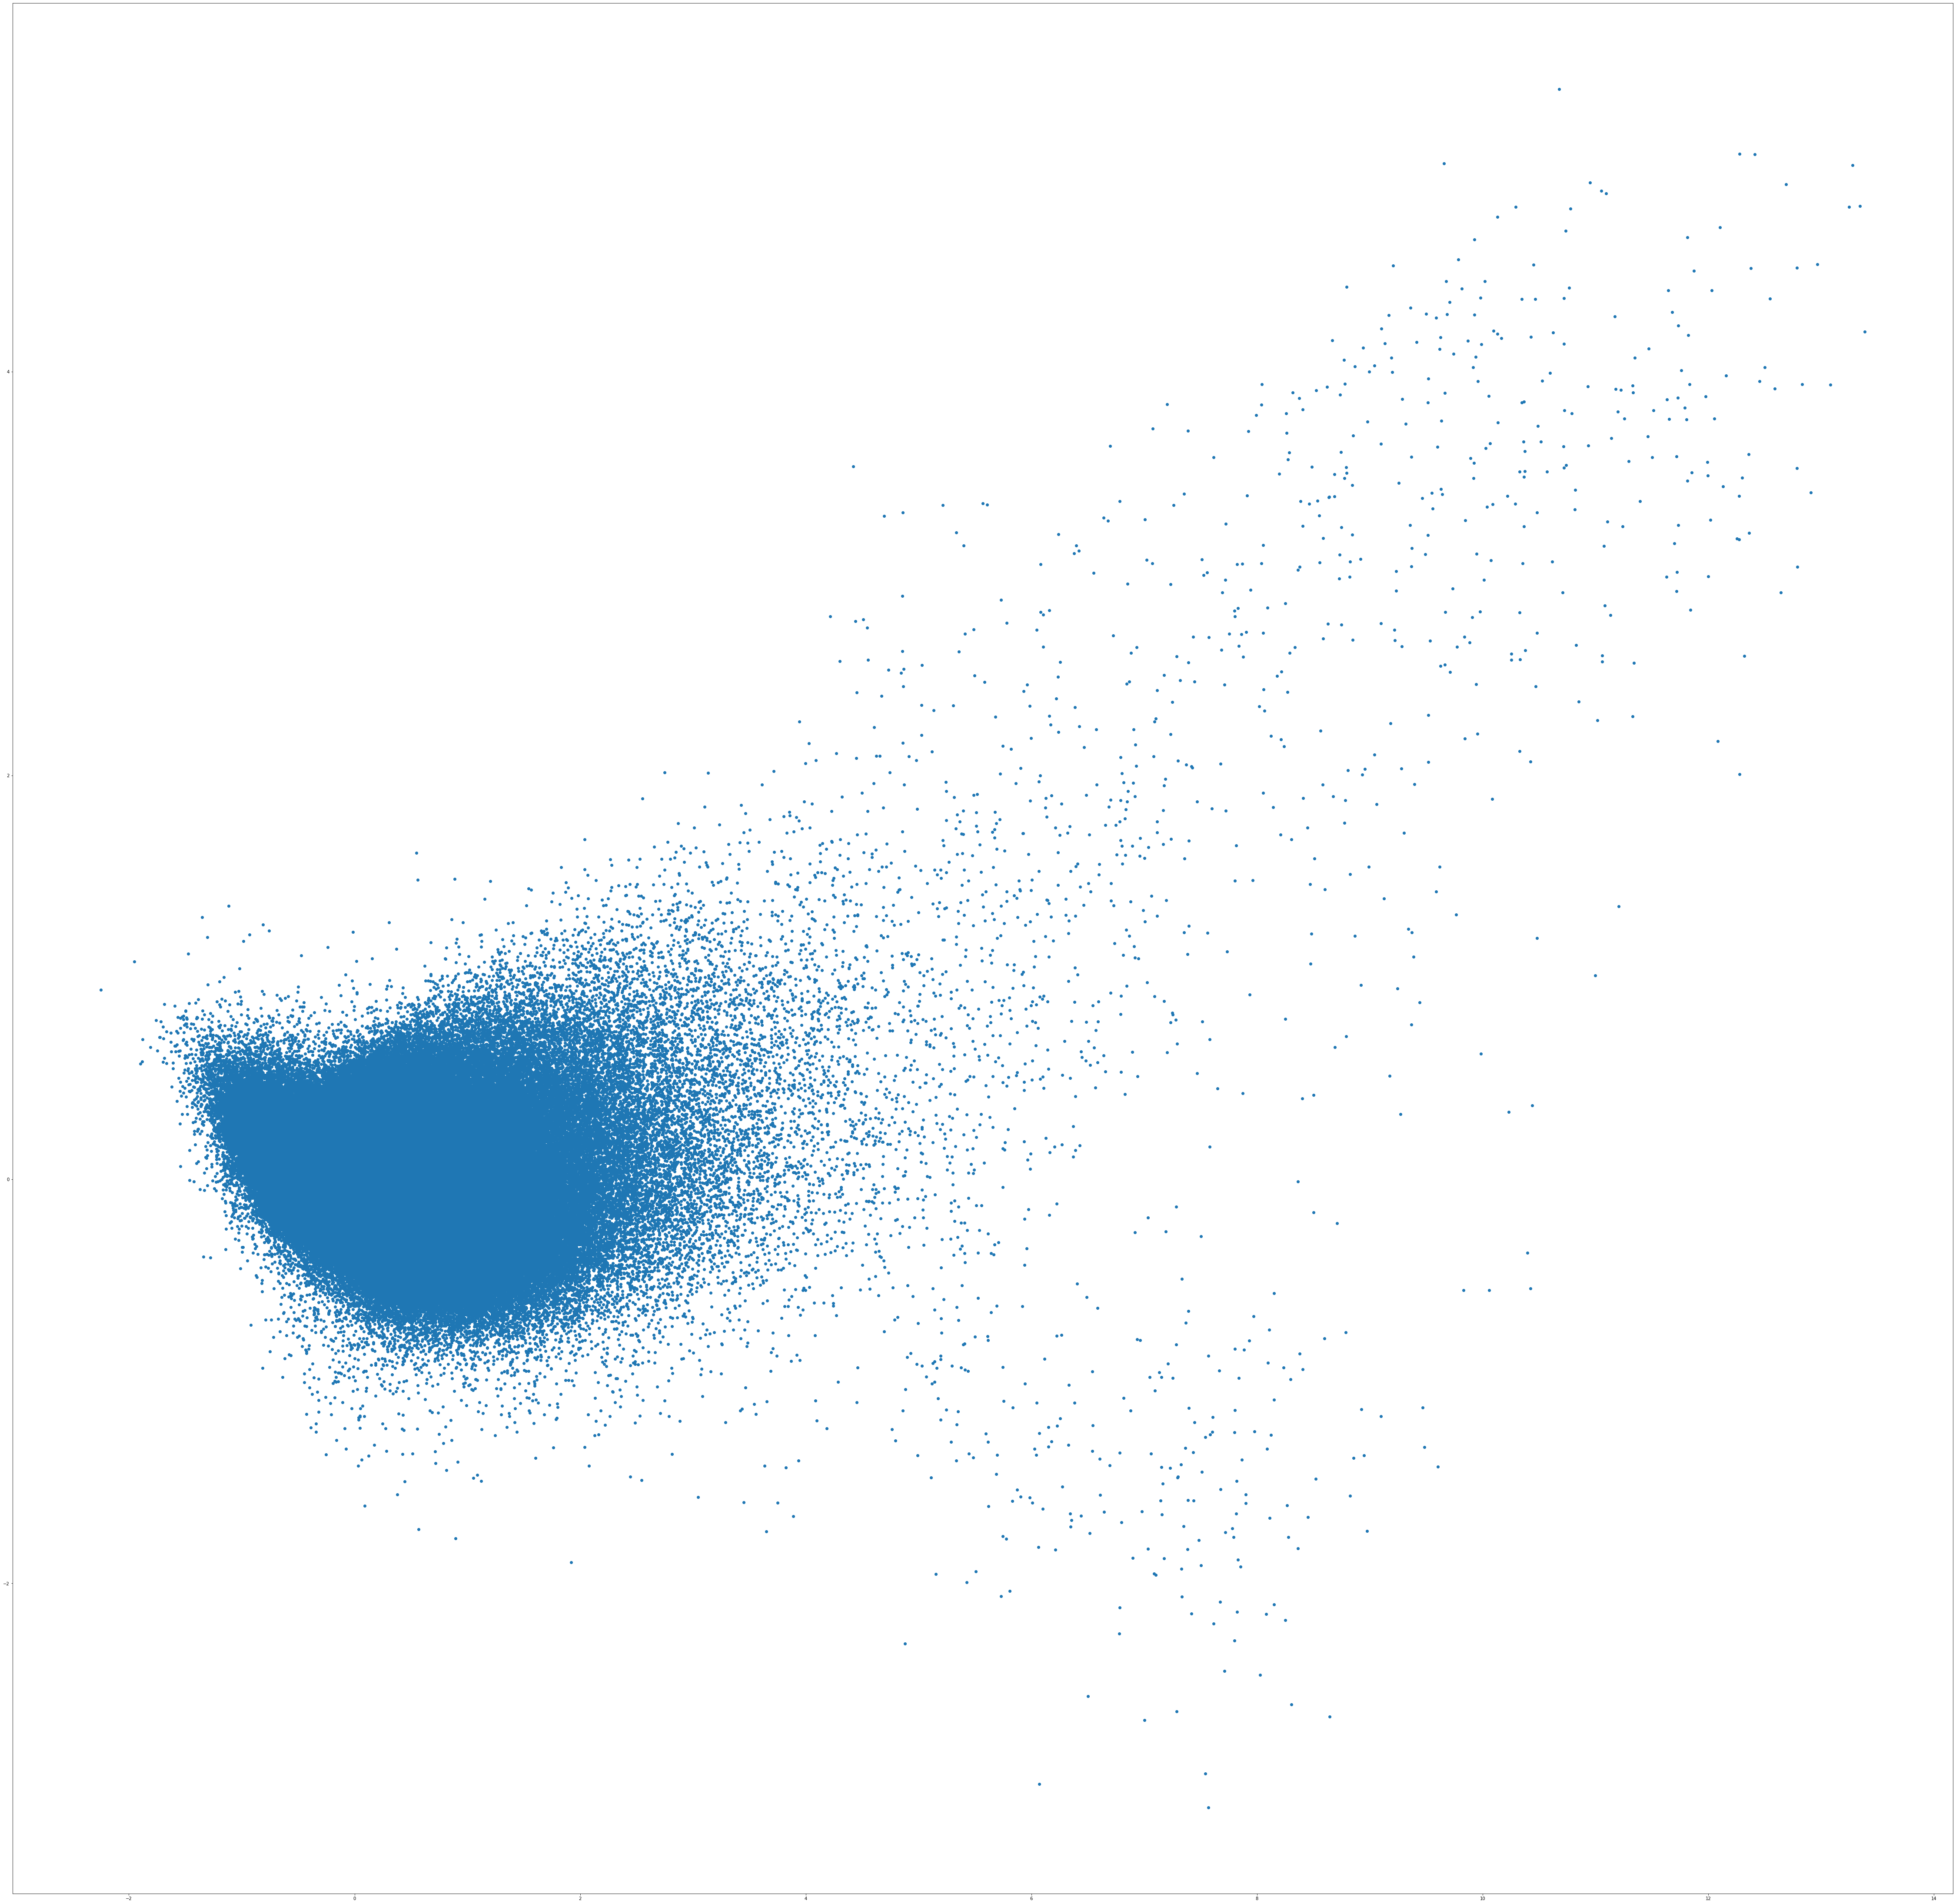

In [130]:
plt.figure(figsize=[80,80])
plt.scatter(datapoint[:, 0], datapoint[:, 1])
plt.show()

In [144]:
kmeans_model = KMeans(n_clusters=8, init='k-means++', max_iter=10000) 
X = kmeans_model.fit(model2.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(model2.docvecs.doctag_syn0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  after removing the cwd from sys.path.


In [29]:
labels

[1,
 0,
 0,
 0,
 6,
 4,
 0,
 0,
 0,
 0,
 5,
 5,
 6,
 0,
 6,
 0,
 0,
 7,
 6,
 6,
 1,
 0,
 0,
 6,
 1,
 5,
 0,
 0,
 0,
 1,
 5,
 1,
 0,
 0,
 6,
 4,
 6,
 5,
 6,
 7,
 5,
 5,
 1,
 4,
 5,
 0,
 5,
 0,
 1,
 1,
 5,
 1,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 4,
 0,
 6,
 4,
 0,
 0,
 5,
 4,
 0,
 0,
 5,
 7,
 7,
 0,
 0,
 5,
 1,
 5,
 7,
 0,
 7,
 5,
 7,
 0,
 6,
 5,
 5,
 0,
 0,
 0,
 6,
 6,
 1,
 0,
 1,
 0,
 6,
 0,
 6,
 0,
 6,
 0,
 0,
 5,
 1,
 5,
 1,
 6,
 0,
 1,
 5,
 0,
 6,
 0,
 6,
 0,
 5,
 5,
 1,
 5,
 0,
 5,
 0,
 0,
 6,
 0,
 5,
 0,
 0,
 1,
 0,
 5,
 0,
 1,
 4,
 0,
 7,
 6,
 0,
 0,
 6,
 6,
 0,
 1,
 0,
 5,
 0,
 0,
 1,
 0,
 5,
 7,
 1,
 0,
 1,
 7,
 0,
 0,
 0,
 1,
 1,
 0,
 6,
 5,
 1,
 1,
 0,
 1,
 7,
 0,
 0,
 0,
 6,
 0,
 1,
 1,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 6,
 1,
 5,
 1,
 4,
 0,
 5,
 7,
 1,
 0,
 0,
 6,
 4,
 7,
 1,
 5,
 0,
 1,
 0,
 6,
 0,
 5,
 1,
 7,
 5,
 6,
 0,
 0,
 1,
 4,
 0,
 6,
 4,
 0,
 5,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 5,
 7,
 6,
 5,
 0,
 6,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 5,
 0,
 1,
 5,
 0,
 1,
 6,
 0,


In [30]:
len(labels)

817474

In [31]:
817474 /4 + 408737

613105.5

In [0]:
labelsTime = labels
for i in range(len(labels)):
  if(i < 204368):
    labelsTime[i] = 0
  if(408737> i > 204368):
    labelsTime[i] = 1
  if(613105> i > 408737):
    labelsTime[i] = 2
  if(i > 613105):
    labelsTime[i] = 3

In [33]:
labelsTime[40000]

0

In [0]:
neutColors= ['#694d4d', '#8d6666', '#674040', '#362727', '#1c1010', '#928888', '#aea9a4', '#969a98', '#606165', '#727074']


import matplotlib.lines as mlines

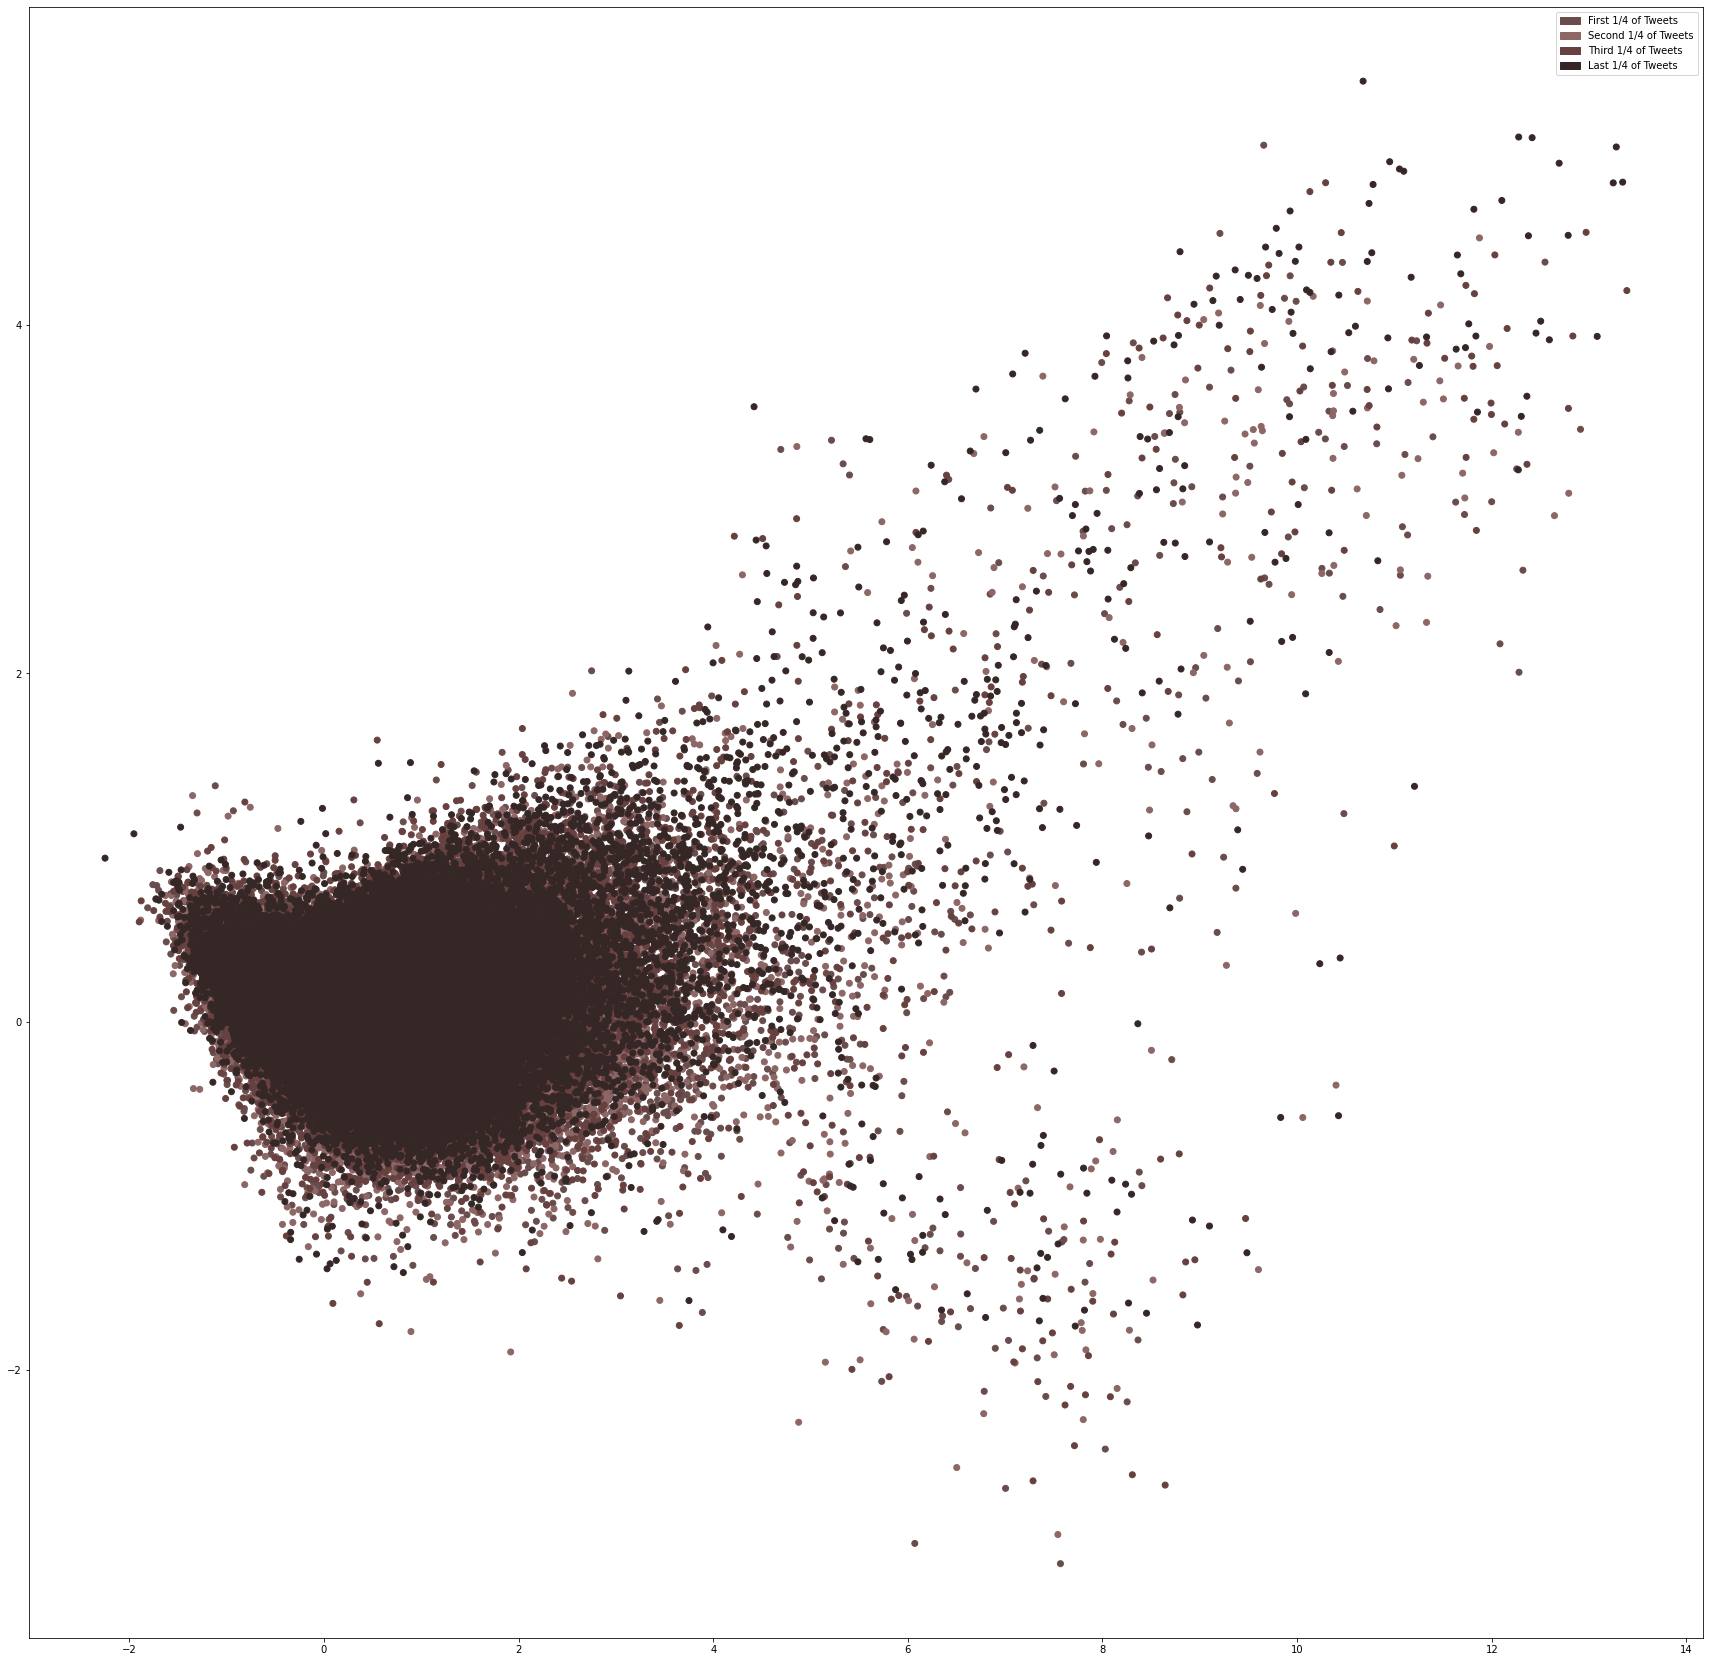

In [156]:

%matplotlib inline

plt.figure(figsize=[30,30])

color = [neutColors[i] for i in labelsTime]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

clus1 = mpatches.Patch(color='#694d4d', label='First 1/4 of Tweets')
clus2 = mpatches.Patch(color='#8d6666', label='Second 1/4 of Tweets')
clus3 = mpatches.Patch(color='#674040', label='Third 1/4 of Tweets')
clus4 = mpatches.Patch(color='#362727', label='Last 1/4 of Tweets')

plt.legend(handles=[clus1, clus2, clus3, clus4])
          
plt.show()

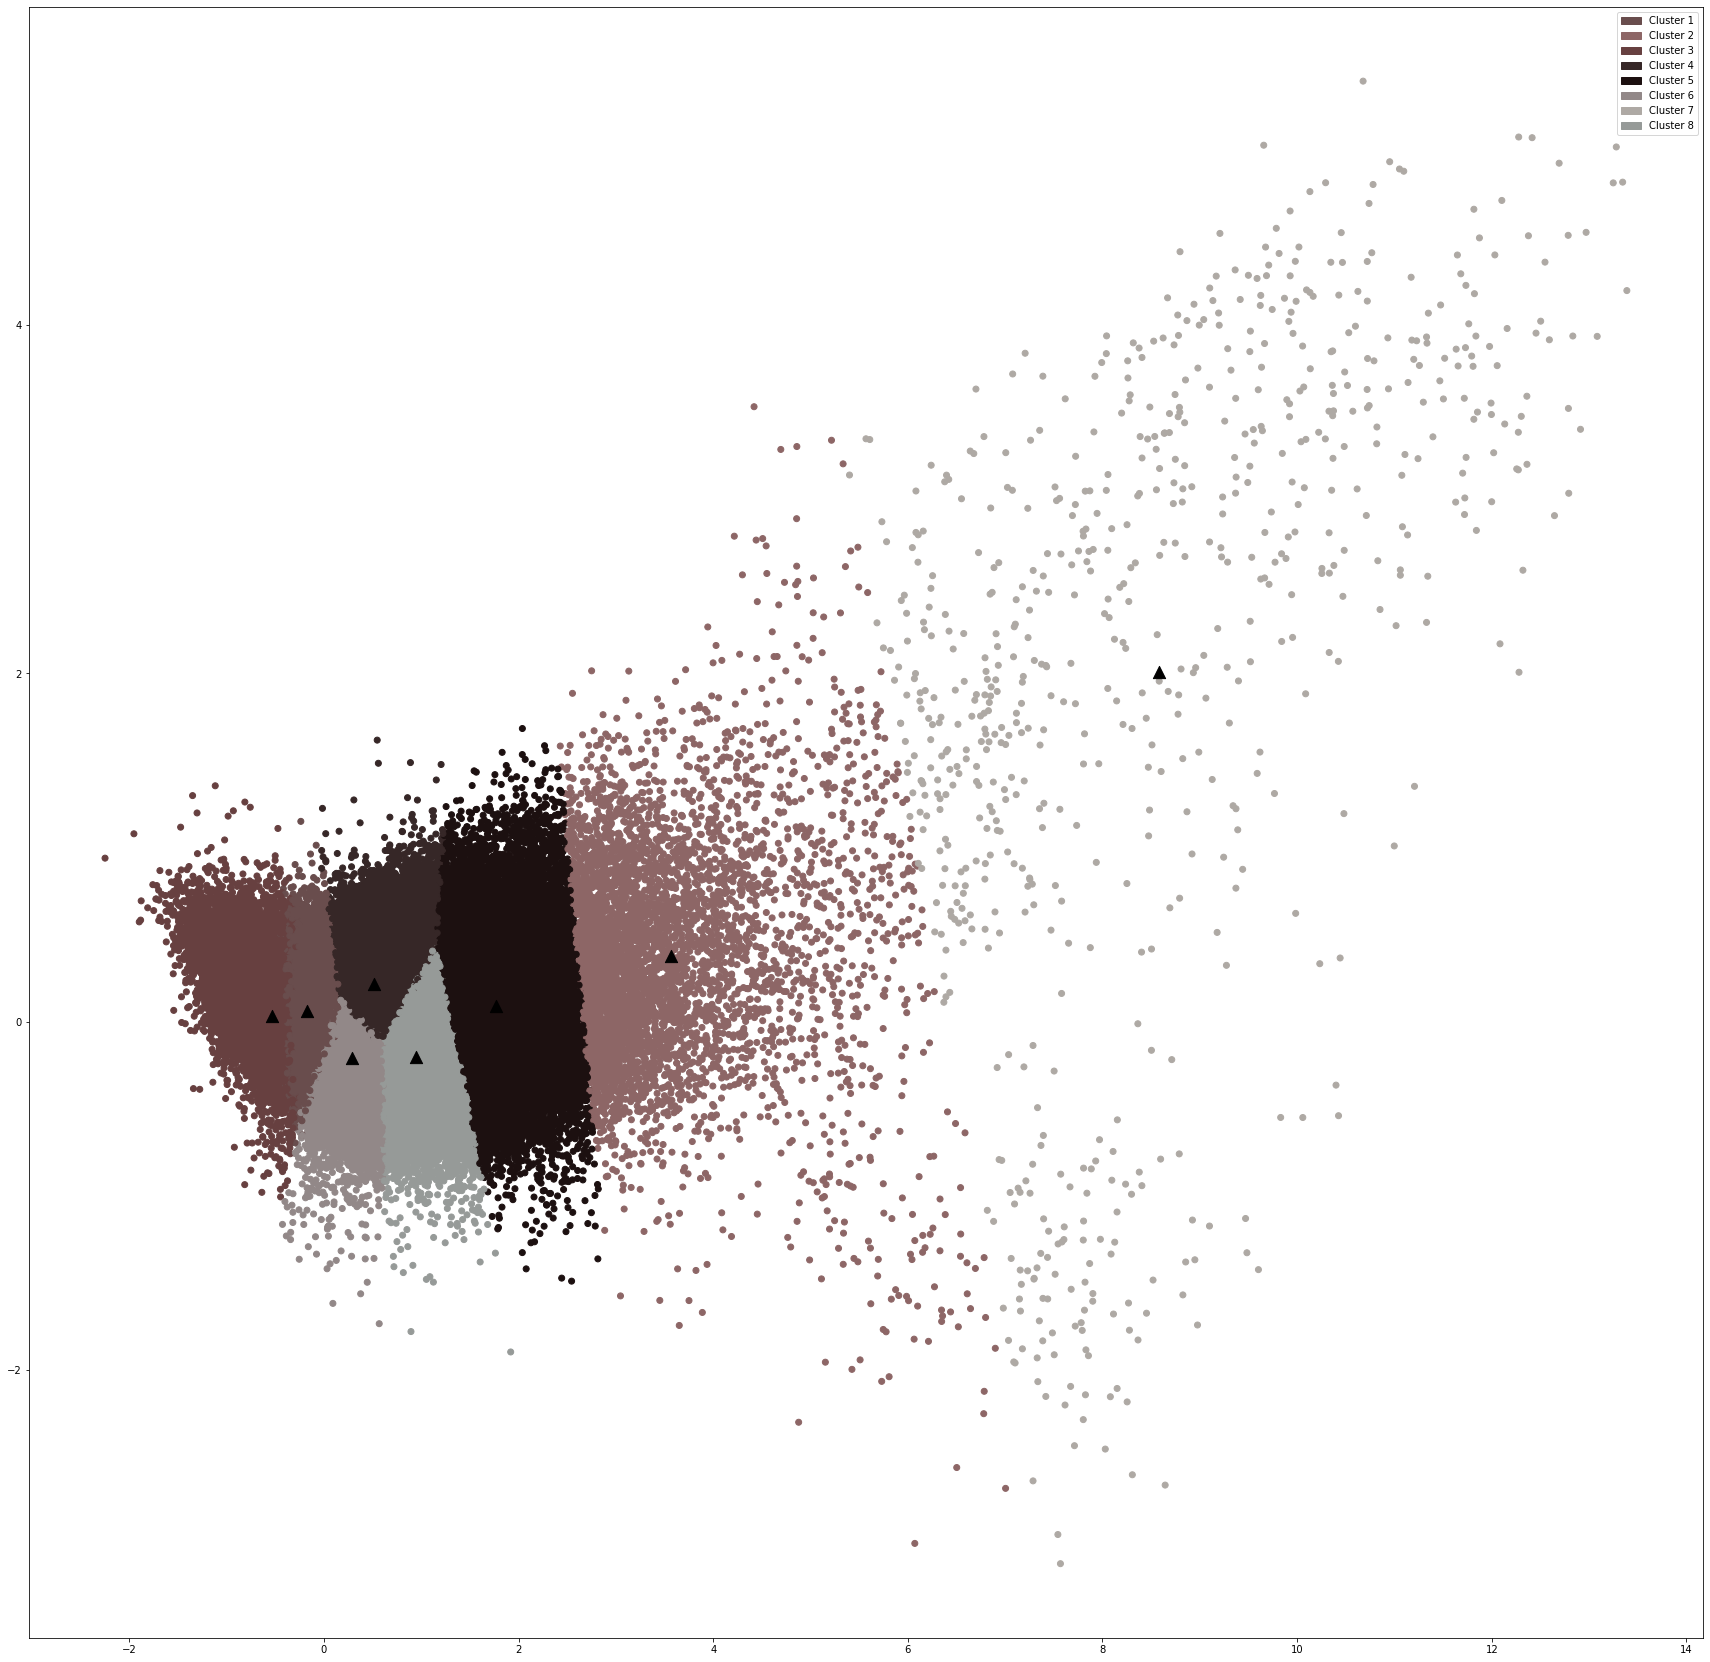

In [151]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[30,30])
neutColors= ['#694d4d', '#8d6666', '#674040', '#362727', '#1c1010', '#928888', '#aea9a4', '#969a98', '#606165', '#727074']

color = [neutColors[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)


clus1 = mpatches.Patch(color='#694d4d', label='Cluster 1')
clus2 = mpatches.Patch(color='#8d6666', label='Cluster 2')
clus3 = mpatches.Patch(color='#674040', label='Cluster 3')
clus4 = mpatches.Patch(color='#362727', label='Cluster 4')
clus5 = mpatches.Patch(color='#1c1010', label='Cluster 5')
clus6 = mpatches.Patch(color='#928888', label='Cluster 6')
clus7 = mpatches.Patch(color='#aea9a4', label='Cluster 7')
clus8 = mpatches.Patch(color='#969a98', label='Cluster 8')
plt.legend(handles=[clus1, clus2, clus3, clus4, clus5, clus6, clus7, clus8])
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

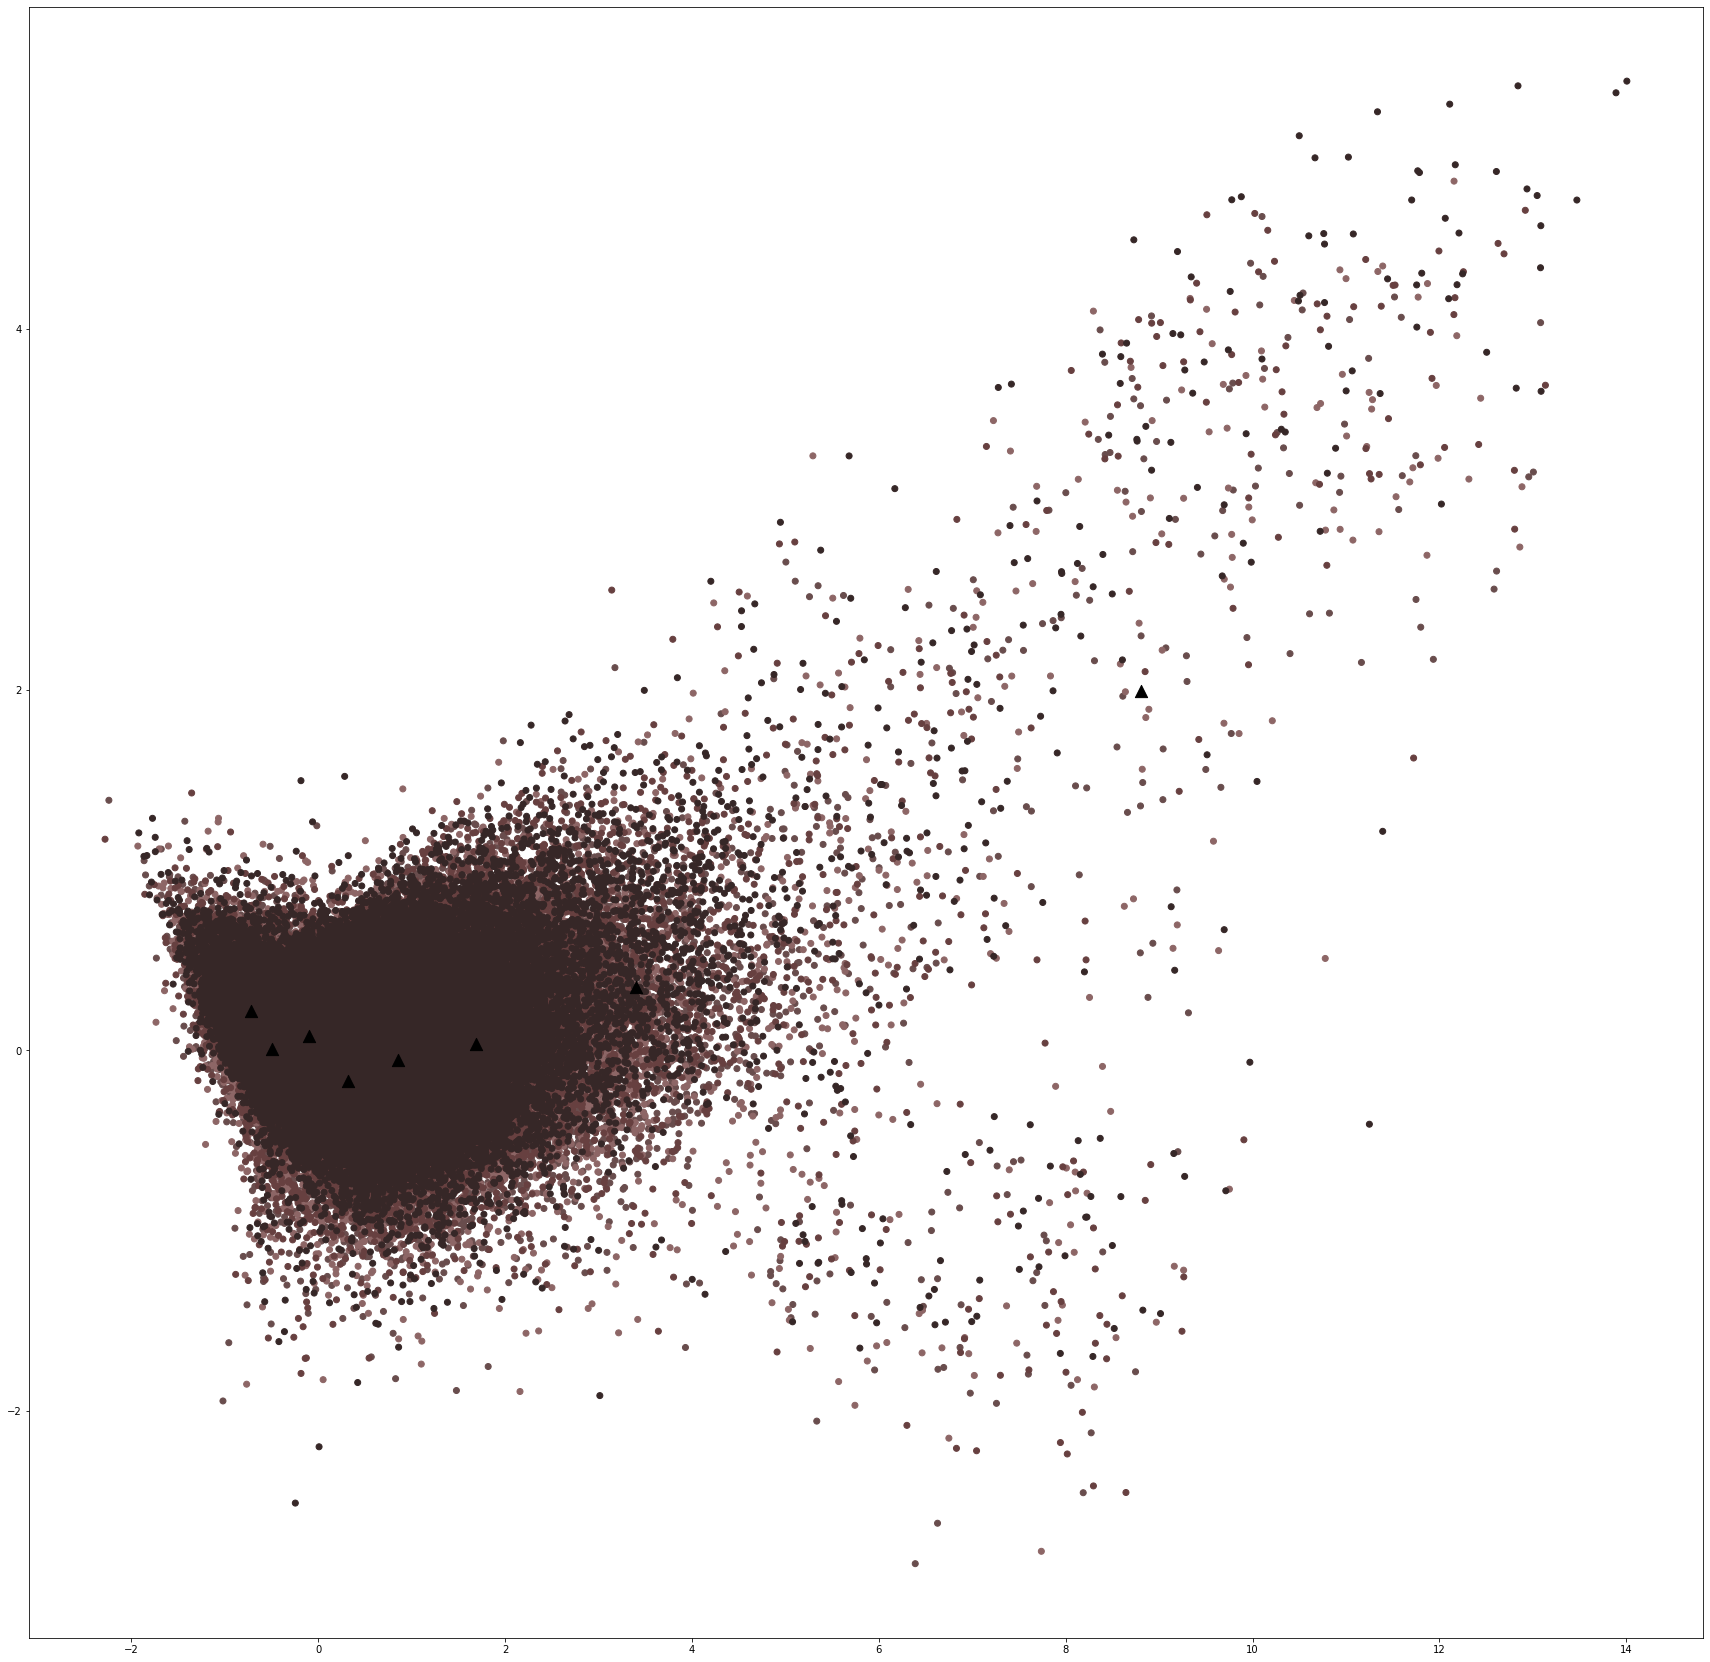

In [37]:
%matplotlib inline

plt.figure(figsize=[30,30])
label1 = ["#FFFF00", "#008000", "#0000FF", "#807689", "#ff99ff", "#ff0000", "#090914", "#ff9900", "#ccafaf", "#cd02fa", "#02f2fa", "#2bfa02" ]
color = [neutColors[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
          
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [0]:
usrPoints = tweetsH['Username']

In [0]:
h['index']

In [0]:
hUsers = h.loc[h['index'].isin(poliS1['Username'].to_list())]
hUsers

In [0]:
poliS1['Username'].to_list()

In [0]:
file = open("/content/drive/My Drive/Tweets/tweetsH.pkl",'rb')
h= pickle.load(file)

In [0]:
h2

In [0]:
hUsers = h.loc[h['index'].isin(poliS['Username'].to_list())]
hUsers

In [0]:
hUsers = df.loc[df['user_id'].isin(poliS1['Username'].to_list())]

In [0]:
poliS['Username'].to_list()

In [0]:
print('fuck')

In [0]:
hUsers = df.loc[df['user_id'].isin(poliS['Username'].to_list())]


In [0]:
hUsers

In [0]:
hUsers2 = df2.loc[df2['user_id'].isin(poliS['Username'].to_list())]
hUsers2

In [0]:
u = hUsers[{'user_id', 'text'}].append(hUsers2[{'user_id', 'text'}])

In [0]:
u

In [0]:
u.to_pickle("/content/drive/My Drive/Tweets/userTweets.pkl")

index                                               text
0           365369  Thank you for this resource @AncientSong7 ! #b...
1           517351  #DonaldTrump praises himself for saving lives ...
2           180369  @MagicMedicine27 Latest Update on #Coronavirus...
3           541659  Absolutely. We must move out of this pandemic ...
4           251516  Sajjad Abiat, a prisoner who was wounded durin...
...            ...                                                ...
354302  4426557017  Thanks to #Covid19, apparently Mark Cuban has ...
354478     6817032  More positive progress. Guidelines for busines...
354839    32470325  Breaking News: Channel Islands Harbor in #Oxna...
354956   154630902  CMS issues explanatory guidance on #StarkLaw b...
354998   874828182  @SenPolehanki Domestic terrorism incited by Tr...

[847736 rows x 2 columns]

NameError: ignored

In [0]:
file = open("/content/drive/My Drive/Tweets/tweetsA.pkl",'rb')
A = pickle.load(file)

In [43]:
rUsers = A.loc[A['index'].isin(rightUsers['Username'].to_list())]
rUsers

index                                               text
5795               60681940  Let's be clear; The MOCKING, UNMASKING\nand EX...
9313             3290965597  #coronavirus directive\nA strong Travel Adviso...
29974            3290965597  So, #coronavirus is not interfering with #TDS ...
51495             567638278  #Coronavirus Lockdown, what lockdown? #Sweden ...
65813            1004694289  @alan_poirier They took so much money from Cdn...
...                     ...                                                ...
268609           3290965597      The #coronavirus hoax https://t.co/Ynxx412MbL
268907  1202785103887437824  #coronavirus \n#Prayer \n#ThursdayThoughts htt...
287891  1202785103887437824  @FLOTUS  I hope you &amp; Barron are having a ...
288526  1202785103887437824                            @FLOTUS 🚫  #coronavirus
334253           3290965597  @GovernorVA @RepDonBeyer Anyone know why Gover...

[1069 rows x 2 columns]

In [44]:
lUsers = A.loc[A['index'].isin(leftUsers['Username'].to_list())]
lUsers

index                                               text
4161              18642254  https://t.co/VFmfncmrMm may be what the curren...
5381             393046380  After #Trump was slow to move on #CoronavirusO...
7119              87752992  It's a matter of discipline for everyone. Resp...
7307    736607856351412224  @dillonliam What if some if us pay more so tha...
7778             874828182  How many Wall Street or Trump people infected?...
...                    ...                                                ...
351671            58360629  This sort of anecdotal evidence points up the ...
352403           165791468  We are all deeply interconnected. Any thought ...
352848           165791468  We are ultimately interconnected and if we bui...
354302          4426557017  Thanks to #Covid19, apparently Mark Cuban has ...
354998           874828182  @SenPolehanki Domestic terrorism incited by Tr...

[3512 rows x 2 columns]

In [45]:
nUsers = A.loc[A['index'].isin(neutralUsersInf['Username'].to_list())]
nUsers

index                                               text
18566    54683181  UPDATE: 720 confirmed cases of #COVID19 in Ala...
22383    54683181  Graph shows the increase in confirmed #COVID19...
242251   54683181  In case you’re just waking up..\nAlabama has 7...
313271   54683181  Danger after Death Part 2:  The ADPH today poi...
313284   54683181  The rest of the post describes safeguards to b...
...           ...                                                ...
190578  196079682  Coronavirus daily updates\n#NationOnline #COVI...
195493   54683181  When it comes to an increase in unemployment r...
238877   54683181  Thursday #COVID19 patient data from Mobile Cou...
240602   54683181  Mobile County HD patient data on those who die...
316629   54683181  3:55pm update: 7,019 confirmed #COVID19 cases ...

[207 rows x 2 columns]

In [0]:
nIndex= nUsers.index.values
rIndex= rUsers.index.values
lIndex= lUsers.index.values
  

In [0]:
nPoints = datapoint[nIndex]

In [50]:
len(nPoints)


207

In [0]:
rPoints = datapoint[rIndex]

In [0]:
lPoints = datapoint[lIndex]

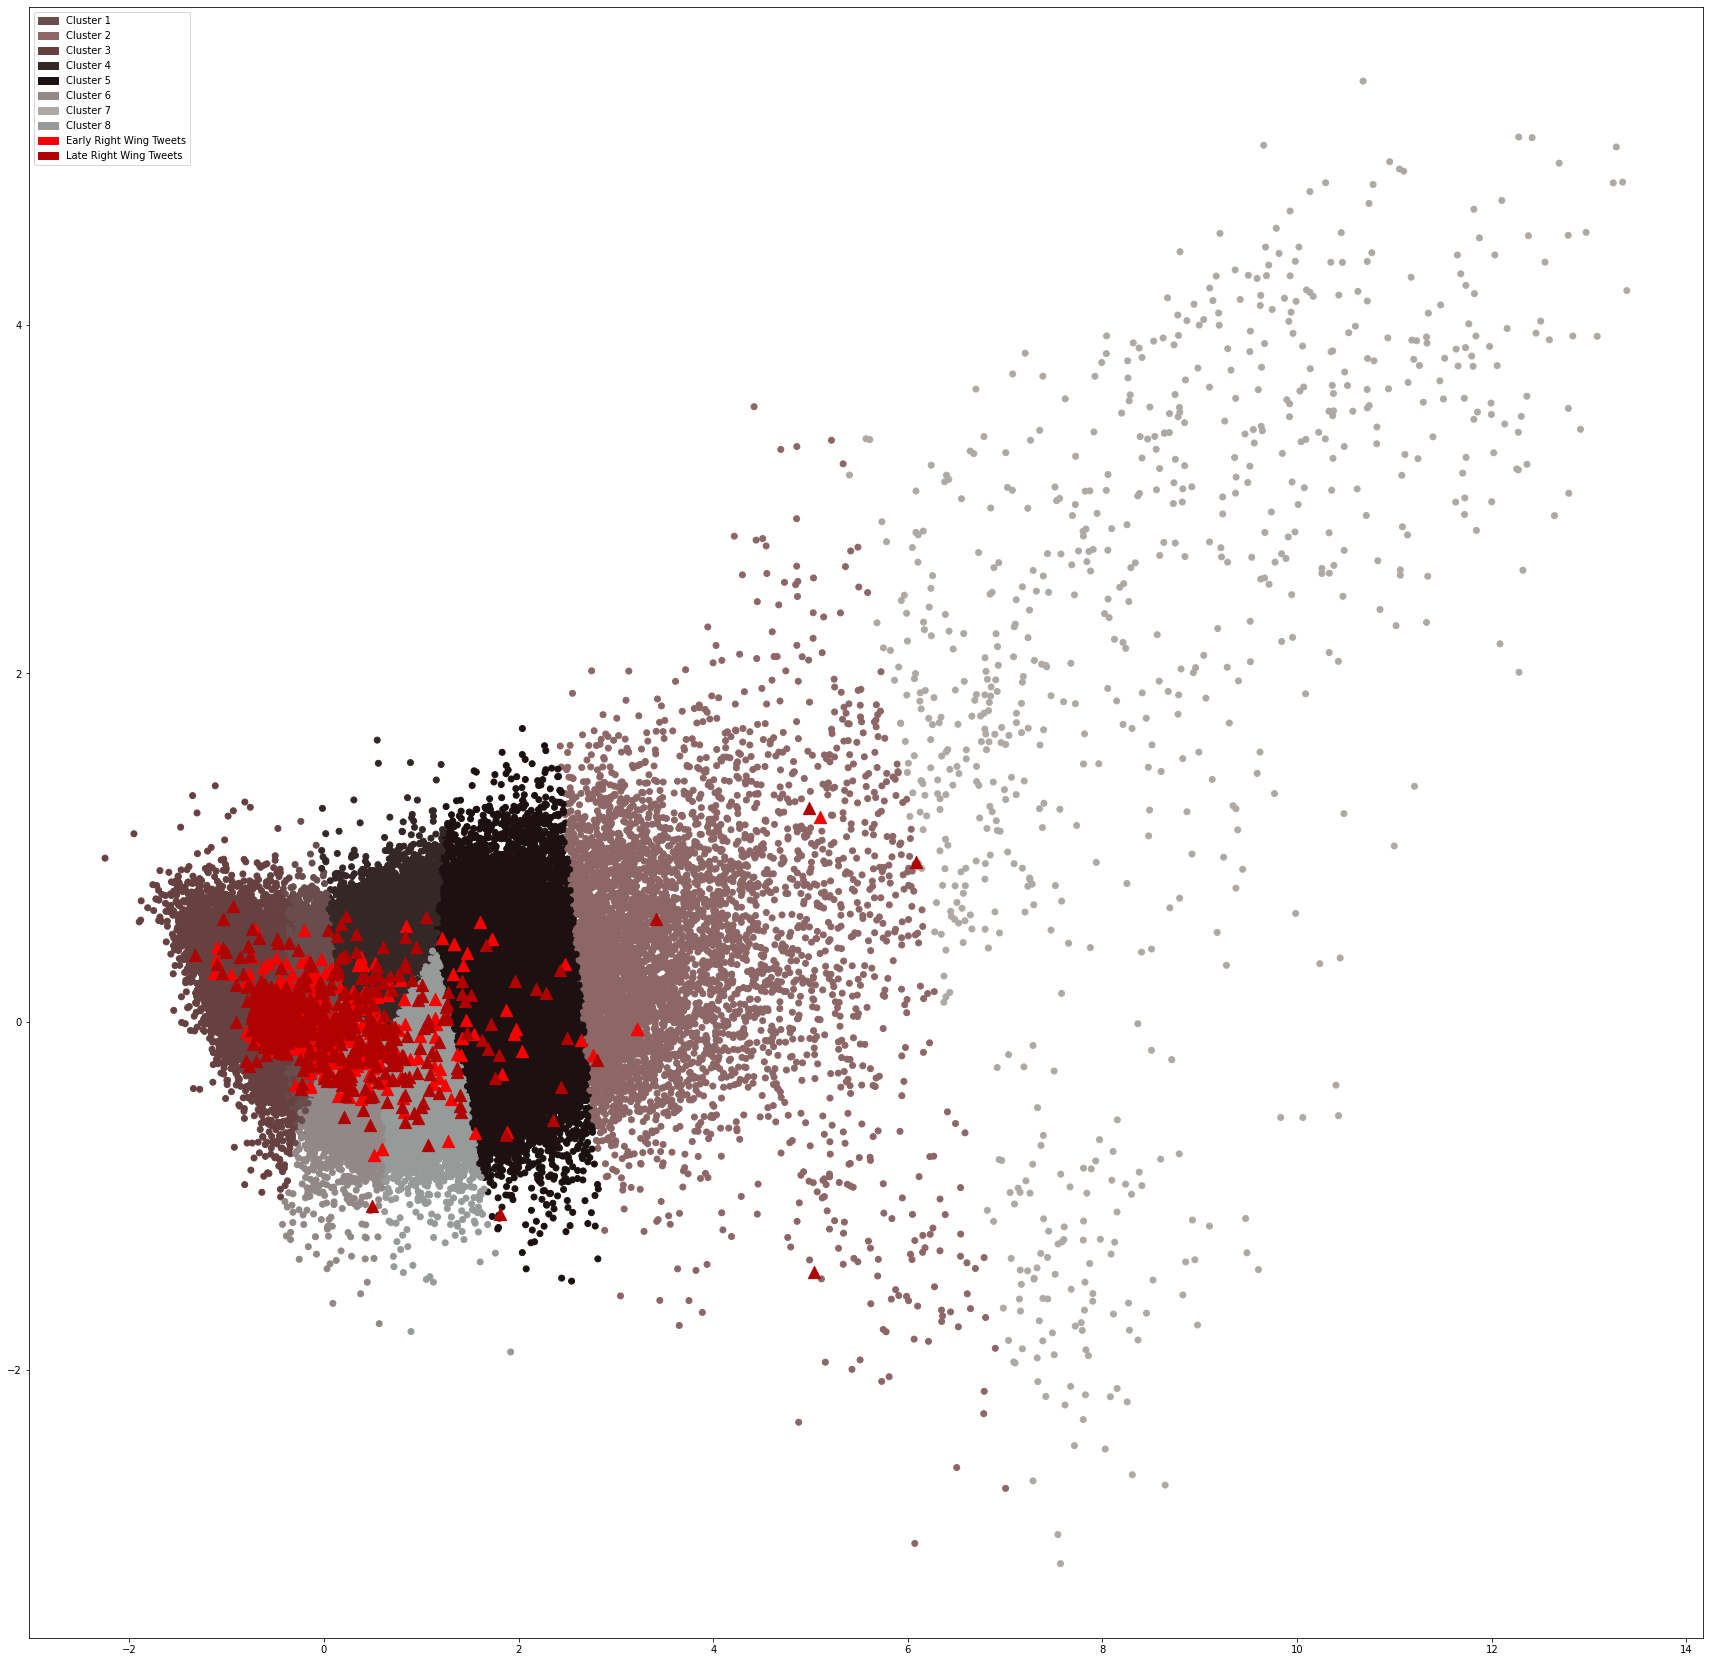

In [152]:
%matplotlib inline

plt.figure(figsize=[30,30])
label1 = ["#FFFF00", "#008000", "#0000FF", "#807689", "#ff99ff", "#ff0000", "#090914", "#ff9900", "#ccafaf", "#cd02fa", "#02f2fa", "#2bfa02" ]
color = [neutColors[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
          

plt.scatter(rPoints[:500, 0], rPoints[:500, 1], marker='^', s=150, c='#f70202')
plt.scatter(rPoints[500:, 0], rPoints[500:, 1], marker='^', s=150, c='#b10202')

clus1 = mpatches.Patch(color='#694d4d', label='Cluster 1')
clus2 = mpatches.Patch(color='#8d6666', label='Cluster 2')
clus3 = mpatches.Patch(color='#674040', label='Cluster 3')
clus4 = mpatches.Patch(color='#362727', label='Cluster 4')
clus5 = mpatches.Patch(color='#1c1010', label='Cluster 5')
clus6 = mpatches.Patch(color='#928888', label='Cluster 6')
clus7 = mpatches.Patch(color='#aea9a4', label='Cluster 7')
clus8 = mpatches.Patch(color='#969a98', label='Cluster 8')
earlyPts = mpatches.Patch(color='#f70202', label='Early Right Wing Tweets')
latePts = mpatches.Patch(color='#b10202', label='Late Right Wing Tweets')
plt.legend(handles=[clus1, clus2, clus3, clus4, clus5, clus6, clus7, clus8, earlyPts, latePts])

plt.show()

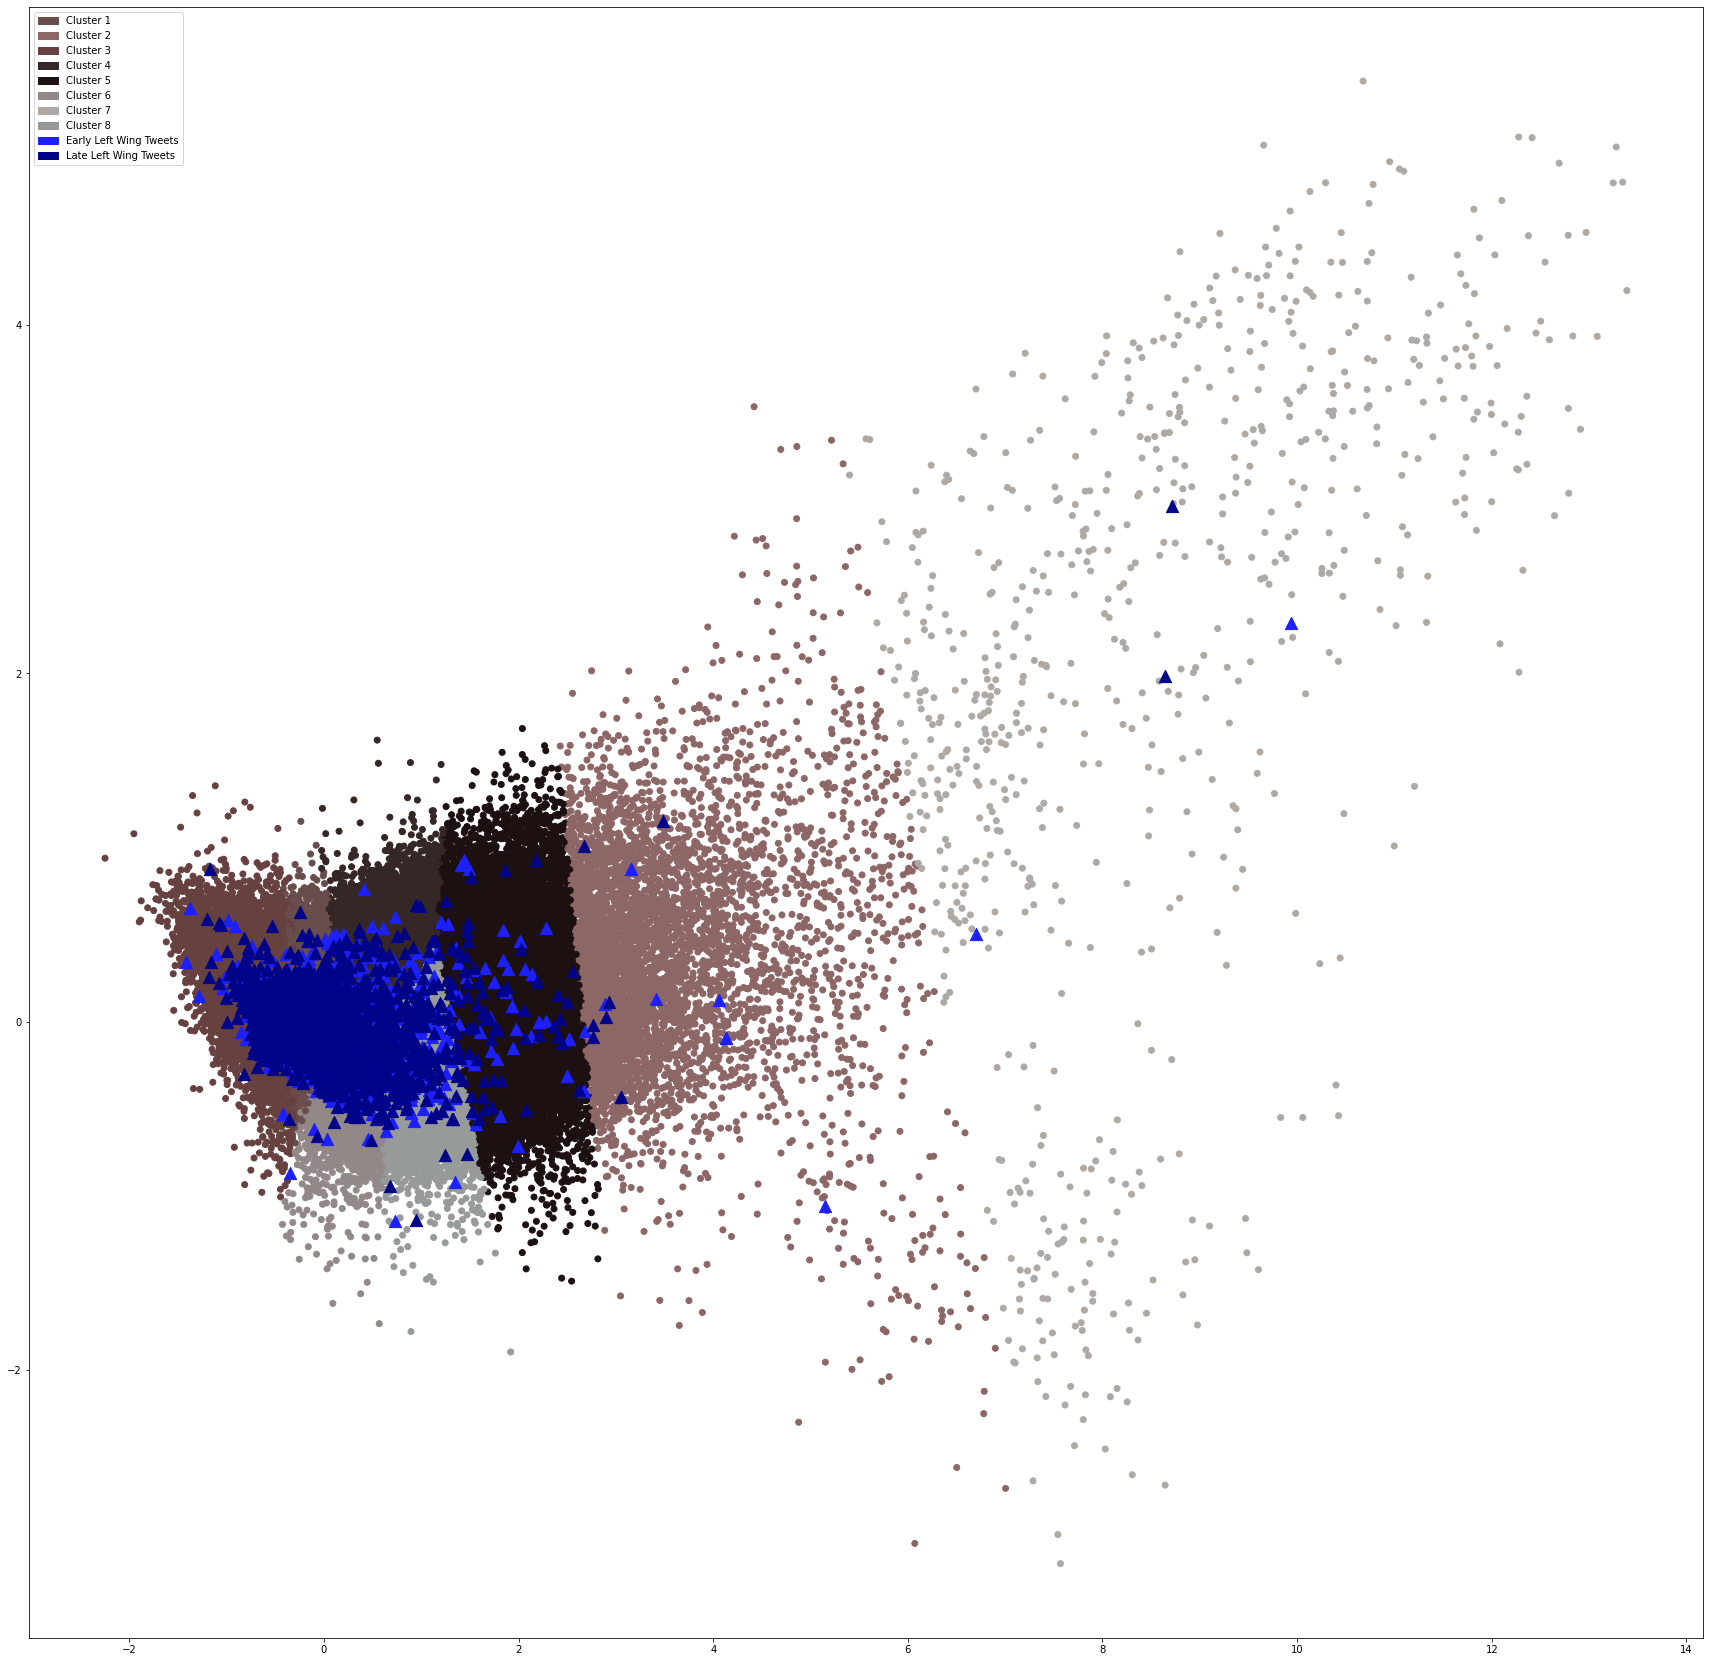

In [153]:
%matplotlib inline

plt.figure(figsize=[30,30])
label1 = ["#FFFF00", "#008000", "#0000FF", "#807689", "#ff99ff", "#ff0000", "#090914", "#ff9900", "#ccafaf", "#cd02fa", "#02f2fa", "#2bfa02" ]
color = [neutColors[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
          

plt.scatter(lPoints[:1500, 0], lPoints[:1500, 1], marker='^', s=150, c='#1c20fd')
plt.scatter(lPoints[1500:, 0], lPoints[1500:, 1], marker='^', s=150, c='#010488')

clus2 = mpatches.Patch(color='#8d6666', label='Cluster 2')
clus3 = mpatches.Patch(color='#674040', label='Cluster 3')
clus4 = mpatches.Patch(color='#362727', label='Cluster 4')
clus5 = mpatches.Patch(color='#1c1010', label='Cluster 5')
clus6 = mpatches.Patch(color='#928888', label='Cluster 6')
clus7 = mpatches.Patch(color='#aea9a4', label='Cluster 7')
clus8 = mpatches.Patch(color='#969a98', label='Cluster 8')
earlyPts = mpatches.Patch(color='#1c20fd', label='Early Left Wing Tweets')
latePts = mpatches.Patch(color='#010488', label='Late Left Wing Tweets')
plt.legend(handles=[clus1, clus2, clus3, clus4, clus5, clus6, clus7, clus8, earlyPts, latePts])

plt.show()

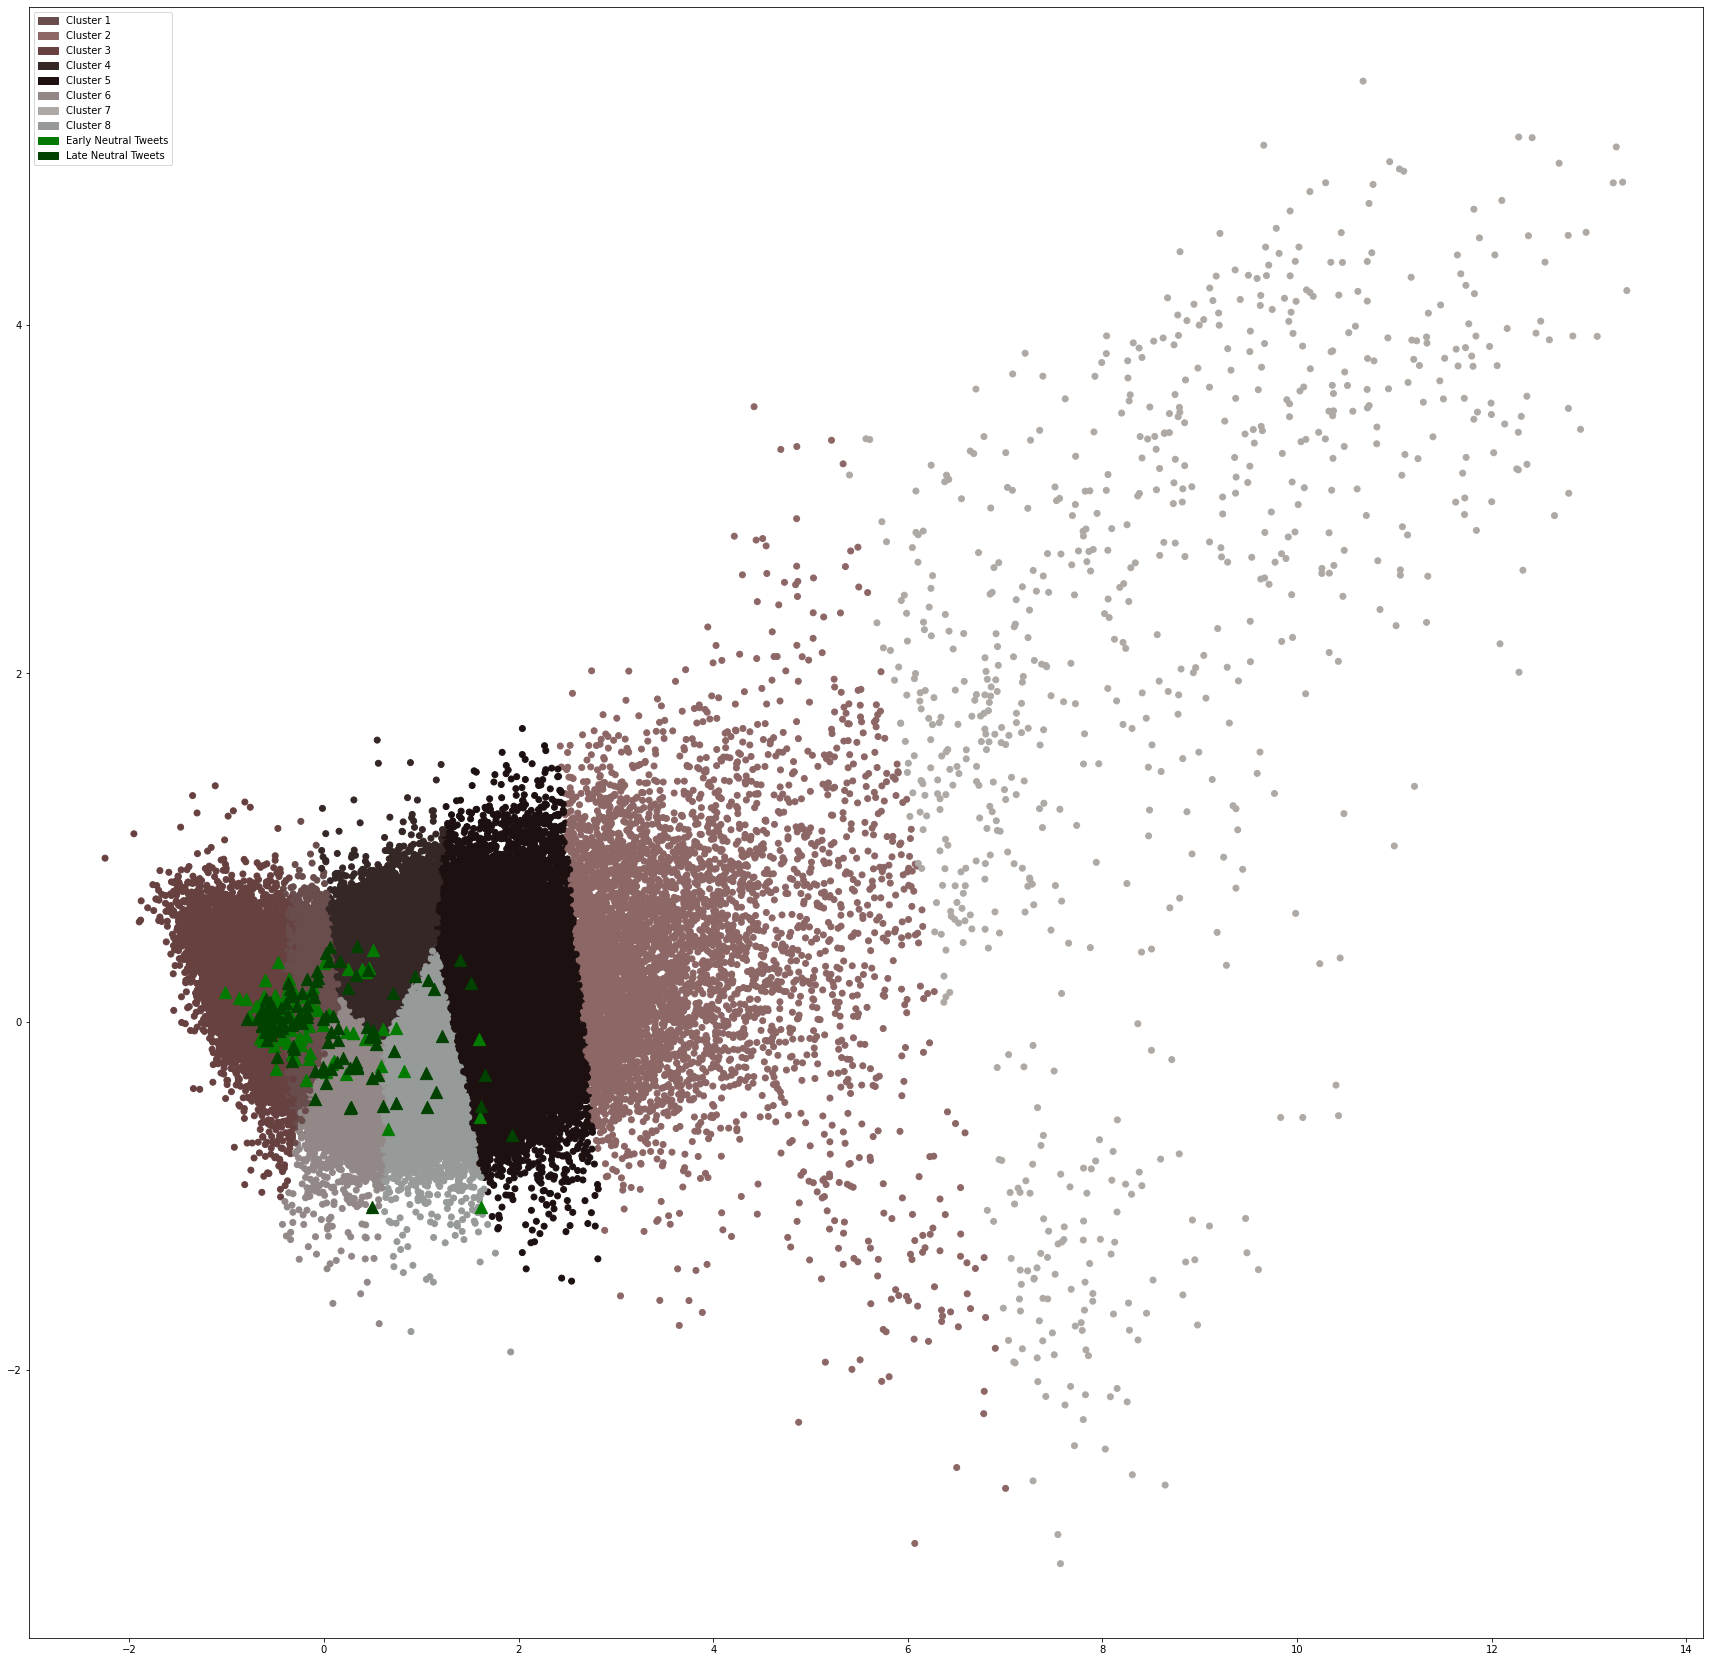

In [154]:
%matplotlib inline

plt.figure(figsize=[30,30])
label1 = ["#FFFF00", "#008000", "#0000FF", "#807689", "#ff99ff", "#ff0000", "#090914", "#ff9900", "#ccafaf", "#cd02fa", "#02f2fa", "#2bfa02" ]
color = [neutColors[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
          

plt.scatter(nPoints[:100, 0], nPoints[:100, 1], marker='^', s=150, c='#027a00')
plt.scatter(nPoints[100:, 0], nPoints[100:, 1], marker='^', s=150, c='#014200')

clus2 = mpatches.Patch(color='#8d6666', label='Cluster 2')
clus3 = mpatches.Patch(color='#674040', label='Cluster 3')
clus4 = mpatches.Patch(color='#362727', label='Cluster 4')
clus5 = mpatches.Patch(color='#1c1010', label='Cluster 5')
clus6 = mpatches.Patch(color='#928888', label='Cluster 6')
clus7 = mpatches.Patch(color='#aea9a4', label='Cluster 7')
clus8 = mpatches.Patch(color='#969a98', label='Cluster 8')
earlyPts = mpatches.Patch(color='#027a00', label='Early Neutral Tweets')
latePts = mpatches.Patch(color='#014200', label='Late Neutral Tweets')
plt.legend(handles=[clus1, clus2, clus3, clus4, clus5, clus6, clus7, clus8, earlyPts, latePts])

plt.show()

In [0]:
tokensA = np.load('/content/drive/My Drive/Tweets/tokensA.npy', allow_pickle=True)

In [0]:

tokens0 = []
tokens1 = []
tokens2 = []
tokens3 = []
tokens4 = []
tokens5 = []
tokens6 = []
tokens7 = []
for i in range(200000):
    if(labels[i]==0):
      tokens0.append(i)
    if(labels[i]==1):
      tokens1.append(i)
    if(labels[i]==2):
      tokens2.append(i)
    if(labels[i]==3):
      tokens3.append(i)
    if(labels[i]==4):
      tokens4.append(i)
    if(labels[i]==5):
      tokens5.append(i)
    if(labels[i]==6):
      tokens6.append(i)
    if(labels[i]==7):
      tokens7.append(i)


In [0]:
tokensA0 = tokensA[tokens0]
tokensA1 = tokensA[tokens1]
tokensA2 = tokensA[tokens2]
tokensA3 = tokensA[tokens3]
tokensA4 = tokensA[tokens4]
tokensA5 = tokensA[tokens5]
tokensA6 = tokensA[tokens6]
tokensA7 = tokensA[tokens7]


In [0]:
np.save('/content/drive/My Drive/Tweets/tokensC0.npy', tokensA0, True)
np.save('/content/drive/My Drive/Tweets/tokensC1.npy', tokensA1, True)
np.save('/content/drive/My Drive/Tweets/tokensC2.npy', tokensA2, True)
np.save('/content/drive/My Drive/Tweets/tokensC3.npy', tokensA3, True)
np.save('/content/drive/My Drive/Tweets/tokensC4.npy', tokensA4, True)
np.save('/content/drive/My Drive/Tweets/tokensC5.npy', tokensA5, True)
np.save('/content/drive/My Drive/Tweets/tokensC6.npy', tokensA6, True)
np.save('/content/drive/My Drive/Tweets/tokensC7.npy', tokensA7, True)


In [105]:
tokens0[10]

['here',
 'excel',
 'book',
 'read',
 'thecoronavirus',
 'covid',
 'apocalyps',
 'httpstcozfqan']

In [0]:
common_dictionary = Dictionary(tokensA0)
common_corpus = [common_dictionary.doc2bow(token) for token in tokensA0]

In [78]:
import pandas as pd
import json
import nltk
import gensim
from nltk.stem.snowball import SnowballStemmer
import re
import numpy as np
import string
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
import nltk
import gensim
from nltk.stem.snowball import SnowballStemmer
import re
import string
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
import pandas as pd
import numpy
import gc
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from gensim.test.utils import get_tmpfile
nltk.download('stopwords')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=common_corpus,
                                           id2word=common_dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [124]:
for i in range(5):
    print(lda_model.print_topics()[i])
    print('...')

(0, '0.116*"covid" + 0.073*"coronavirus" + 0.013*"pandem" + 0.013*"case" + 0.011*"test" + 0.010*"health" + 0.009*"death" + 0.007*"lockdown" + 0.007*"work" + 0.006*"state"')
...
(1, '0.015*"home" + 0.014*"live" + 0.011*"realdonaldtrump" + 0.011*"world" + 0.011*"respons" + 0.009*"public" + 0.009*"social" + 0.007*"call" + 0.007*"stay" + 0.007*"nurs"')
...
(2, '0.013*"need" + 0.011*"help" + 0.010*"like" + 0.008*"fight" + 0.007*"care" + 0.007*"china" + 0.007*"virus" + 0.007*"spread" + 0.007*"dont" + 0.007*"crisi"')
...
(3, '0.031*"support" + 0.026*"deliv" + 0.019*"last" + 0.015*"sign" + 0.015*"offici" + 0.012*"must" + 0.011*"copi" + 0.011*"right" + 0.010*"person" + 0.009*"well"')
...
(4, '0.020*"peopl" + 0.014*"trump" + 0.011*"time" + 0.010*"govern" + 0.010*"countri" + 0.009*"make" + 0.006*"global" + 0.005*"give" + 0.005*"good" + 0.005*"go"')
...
